## Dijkstra's Algorithm

Dijkstra's algorithm is an algorithm for finding the shortest paths between nodes in a graph.

There are many variants to this algorithm, we will focus on the main one for programming and discuss the others breifly.

### Heuristic description

Consider the connected graph $G = (V, E, \sigma)$, where $\sigma(e) \geq 0 \; \forall e\in E$

Given a source node, $s\in V$, and a target node, $t\in V$, the goal is to find the minimum s-t path in G.

We start the algorithm at $s$ and look at all the neighbors of $s$ and records the minimum cost to get to that neighbor. For the first step, this is simply the weight of that edge, $\sigma(e)$.

We then choose one of these neighbors, look at it's neighbors and record the total minimum cost of the path from the source node. Note: some of these neighbors could be neighbors of the source node, and only the minimum cost is recorded.

We continue this until we reach the target node, and the minimum is found.

We can now illustrate this process before we try to write a code.

In [22]:
import numpy as np
import networkx as nx
import random as rnd
import matplotlib.pyplot as plt

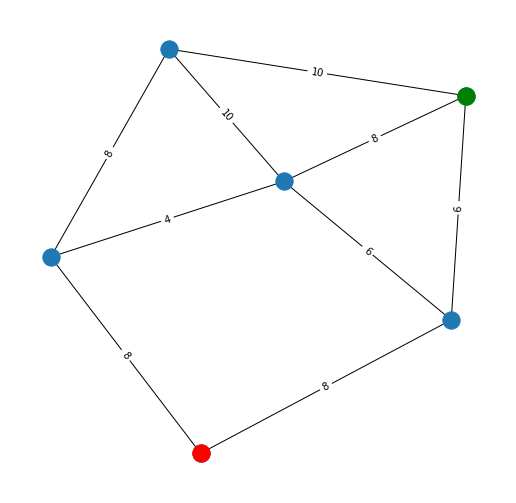

In [21]:
G = nx.wheel_graph(5)
G.add_node(5)
G.add_edges_from([(3,5),(4,5)])
G.remove_edge(3,4)

pos = nx.spring_layout(G)

source = [2]
target = [5]

sigma = {edge:rnd.randint(2, 10) for edge in G.edges}

plt.figure(figsize=(9,9))
plt.gca().set_axis_off()
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_nodes(G, pos, source, node_color='g')
nx.draw_networkx_nodes(G, pos, target, node_color='r')
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, sigma)
plt.savefig('dijkstra_initial.png')
None

In [23]:
for (a, b) in G.edges():
    G[a][b]['weight'] = rnd.randint(2,10)

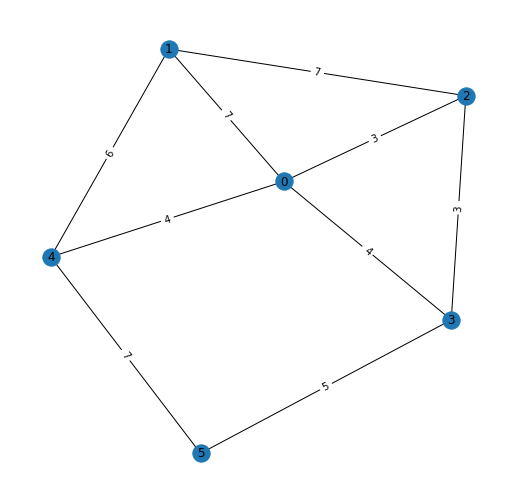

In [30]:
weight = {(a, b):d['weight'] for a, b, d in G.edges(data=True)}

plt.figure(figsize=(9,9))
plt.gca().set_axis_off()
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, weight)
None

In [37]:
def Dijkstra(G, source):
    """Algorithm to find the shortest path from a source node s, to all other nodes in the graph. 
    Graph must have nonnegative edge weights."""
    
    #'To keep the track of visited nodes we are using Dict'
    nodesVisited = {source: 0}
    nodes = set(G.nodes())
    
    #To keep track of nodes from Source to destination we are using Dict" 
    parent = {source: -1}
    
    for a, b, d in G.edges(nbunch=source, data=True):
        nodesVisited[b] = d['weight']
        #joining source to Dict to start from that source
        parent[b]= source
        
        
    nodes.remove(source)
    #here m is a node
    for j in nodes:
        if j in nodesVisited:
            for a, b, d in G.edges(nbunch= j, data=True):
                weight = nodesVisited[j] + d['weight']
                if b not in nodesVisited or weight < nodesVisited[b]:
                    nodesVisited[b] = weight
                    #appending nodes to Dict to start from source to destination
                    parent[b]= j
                    #using loop to print paths which are stored in parent Dict
     #below used variable k is a node               
    for k in nodes:
        path= []
        x = k
        while x!=-1:
            path.append(x)
            x= parent[x]
            print(k,": ",path[-1::-1])
    return 

In [38]:
Dijkstra(G, 4)

0 :  [0]
0 :  [4, 0]
1 :  [1]
1 :  [4, 1]
2 :  [2]
2 :  [0, 2]
2 :  [4, 0, 2]
3 :  [3]
3 :  [0, 3]
3 :  [4, 0, 3]
5 :  [5]
5 :  [4, 5]
